# Project: Wrangling and Analyze Data

In [723]:
#import required packages:
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import datetime

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [724]:
#import the WeRateDog Twitter archive
twitter_archive_enchanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [725]:
#import Tweet image predictions:
twt_image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(twt_image_url)

if response.status_code == 200:
    with open("image_predictions.tsv", "wb") as file:
        file.write(response.content)
        print("Datasheet downloaded successfully!")
else:
    print("Failed to download datasheet. Status code:", response.status_code)

Datasheet downloaded successfully!


In [726]:
#inspecting image_predictions.csv
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [727]:
tweet_list = []
with open('tweet-json.txt', 'r') as json_text:
    data = json_text.read()
    json_objects = data.split('\n')
    parsed_objects = []
    for json_object in json_objects:
        if json_object.strip():
            parsed_objects.append(json.loads(json_object))
for obj in parsed_objects:
        tweet_id = obj['id']
        favorite_count = obj['favorite_count']
        retweet_count = obj['retweet_count']

        tweet_list.append({'tweet_id': str(tweet_id),
                                'favorite_count': int(favorite_count),
                                'retweet_count': int(retweet_count),
                            })
        tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count','retweet_count'])



In [728]:
tweet_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### 1. Inspecting `Twitter_archive_enhance` dataframe:

In [729]:
twitter_archive_enchanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [730]:
twitter_archive_enchanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [731]:
twitter_archive_enchanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [732]:
twitter_archive_enchanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [733]:
"""
:return -  total of dog in the stage
:param  - (stage) = 'pupper','puppo','doggo','floofer'
"""
def catgorized_stage(stage):
    number = (twitter_archive_enchanced[stage] == stage).sum()
    return number

stage = ('pupper','puppo','doggo','floofer')
categorized = 0
for dog in stage:
    print(f'Number of {dog}: {catgorized_stage(dog)}')
    categorized += catgorized_stage(dog)
print(f'Number of dog arent sorted to any stages: {twitter_archive_enchanced.shape[0] - categorized}')


Number of pupper: 257
Number of puppo: 30
Number of doggo: 97
Number of floofer: 10
Number of dog arent sorted to any stages: 1962


In [734]:
twitter_archive_enchanced['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

It looks like beside from 'None' the incorrect names like 'old', 'a', 'my' ,etc. are lowercase.

In [735]:
lowercase_names = twitter_archive_enchanced[twitter_archive_enchanced['name'].str.islower()]
suspect_name = lowercase_names['name'].unique()
suspect_name

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [736]:
"""print the text of the tweet
param: -String- column name 
       -int64-  value: vaulue of the corresponding column's cell
"""
def print_tweet(col_name, value):
        print(twitter_archive_enchanced.loc[twitter_archive_enchanced[col_name] == value, 'text']) 

In [737]:
pd.set_option('display.max_colwidth', None)
for name in suspect_name:
    print_tweet(col_name='name',value=name)

22    I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
Name: text, dtype: object
56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649                                Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801                    Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002                   This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004                     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017           

Correct names:<br>
22: Roxy the Doxy <br>
649: Forrest <br>
801: Galapagos Speed Panda<br>
1853: Wylie<br>
<br>
others don't provided names

In [738]:
twitter_archive_enchanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [739]:
#with pd.set_option('display.max_colwidth', None):
rating = (204,143,666,1776,144)
for i in rating:
    print_tweet(col_name='rating_numerator',value=i)



1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: text, dtype: object
189    @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Name: text, dtype: object
979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: text, dtype: object


In [740]:
twitter_archive_enchanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [741]:
pd.set_option('display.max_colwidth', None)
ratingDenominator = (11, 50, 20, 80, 70, 7, 15, 150, 0, 170, 90, 40, 130, 110, 110, 16, 120, 2)
for i in ratingDenominator:
    print_tweet(col_name='rating_denominator',value=i)

784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Name: text, dtype: object
1202                                 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1274    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1351                                                                    Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
Name: text, dtype: object
1165                                

1. 784 rating should be 14/10 instead of 9/11     
2. 1068 rating should be 14/10 instead of 9/11 
3. 1662 rating should be 10/10 instead of 7/11 
4. 1202 rating should be 11/10 instead of 50/50 
5. 1274 rating should be 9/10 instead of 45/50 (5 dogs) 
6. 1351 rating should be 12/10 instead of 60/50 (5 dogs) 
7. 1165 rating should be 13/10 instead of 4/20
8. 1254 rating should be 10/10 instead of 80/80 (8 dogs) 
9. 1843 rating should be 11/10 instead of 88/80 (8 dogs) 
10. 433 rating should be 12/10 instead of 84/70
11. 516 dont have rating - this data should be remove, but I would vote 10/10 for Sam :)
12. 342 dont have rating - this data should be remove, incorrect tweet mb.
13. 1120 rating should be 11/10 instead of 204/170
14. 1228 rating should be 11/10 instead of 99/90
15. 1433 rating should be 11/10 instead of 44/40
16. 1634 rating should be 11/10 instead of 143/130
17. 1635 rating should be 11/10 instead of 121/110
18. 1663 rating should be 13/10 instead of 20/16
19. 1779 rating should be 12/10 instead of 144/20
20. 2335 rating should be 9/10 instead of 1/2
21. 313 rating should be 13/10 instead of 960/00


##### Issues Found:
1. `timestamp` and retweeted_status_timestamp are string object.
2. `Dog stages` (doggo, puppo, pupper, floofer) are stored in multiple columns
3. `names` contains inaccurate value: None, 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an','very', 'just', 'my', 'his', 'actually', 'getting', 'this',
'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
'officially', 'life', 'light', 'space', O
4. `in_reply_to_status_id`, `in_reply_to_user_id` ,`retweeted_status_id` and `retweeted_status_user_id` are float.
5. `rating_numerator` and `rating_denominator` are incorrect.

2. Inspecting `df_image_predictions` dataframe:

In [742]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [743]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [744]:
df_image_predictions.duplicated().sum()

0

In [745]:
#check the images that was failed to recognized dogs with all 3 algorithm:
condition = (df_image_predictions['p1_dog'] == False) & (df_image_predictions['p2_dog'] == False) & (df_image_predictions['p3_dog'] == False)
filtered_df = df_image_predictions[condition]

filtered_df['jpg_url']

6                                               https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
17                                              https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
18                                              https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg
21                                              https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg
25                                              https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg
                                                 ...                                           
2021                                            https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg
2022                                            https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg
2046                                            https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg
2052    https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg
2074                                    

In [746]:
merge_tw = pd.merge(filtered_df,twitter_archive_enchanced, on='tweet_id')


In [747]:
#check the contents and URL of those tweets with no dogs in the picture:
merge_tw['text']

0                              This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
1                                  Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX
2                                                                                      Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk
3                              This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0
4                            Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM
                                                                                      ...                                                             

##### Issues found:

1. 'tweet_id' are int type

##### 3. Inspecting `tweet_json` dataframe:

In [748]:
tweet_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [749]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [750]:
tweet_json.duplicated().sum()

0

### Quality issues
1. `twitter_archive_enhance`: 'name' some names are incorrect.

2. `twitter_archive_enhance` dataframe: some of 'rating_numerator' and 'rating_denominator' are not correct.

3. `twitter_archive_enhance`: 'timestamp' are string objects

4. `twitter_archive_enhance`: 'tweet_id' are int type

5. `df_image_predictions`: 'tweet_id' are int type

6. `twitter_archive_enhance`: 1962 dogs are not shorted into any of the 4 stages, 14 dogs are sorted into 2 types

7. `twitter_archive_enhance`: 'retweeted_status_timestamp' are string objects

8.  `twitter_archive_enhance`: 'reply_to_status_id', 'in_reply_to_user_id' ,'retweeted_status_id' and 'retweeted_status_user_id' are float.

### Tidiness issues
1. `twitter_archive_enhance`: 'Dog stages' (doggo,puppo,etc) are stored in multiple columns

2. `twitter_archive_enhance`: 'text' contains both tweet's content and its URL 

3. `twitter_archive_enhance`: 2 columns for the `rating` values: `numerator` and `denominator`

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [751]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive_enchanced.copy()
df_image_predictions_clean = df_image_predictions.copy()
tweet_json_clean = tweet_json.copy()


### Issue #1: Quality issues

#### Define:
1. Merge the clean versions of `twitter_archive_enhance`, `df_image_predictions`, and `tweet_json dataframes`.
2. Change `tweet_id` from an integer to a string
3. Change the `timestamp` and `retweeted_status_timestamp` to correct datetime format.
4. Correct dog names.
5. Correct ratings in 'rating_numerator' and 'rating_denominator'
6. Remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns. While 'reply_to_status_id', 'in_reply_to_user_id' change to string.

#### Code

1. Cast `tweet_id(s)` to string

In [752]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [753]:
twitter_archive_clean.shape[0] #twitter_archive_clean rows

2356

In [754]:
df_image_predictions_clean['tweet_id'] = df_image_predictions_clean['tweet_id'].astype(str)

In [755]:
df_image_predictions_clean.shape[0] #df_image_predictions_clean rows

2075

In [756]:
tweet_json_clean['tweet_id'].shape[0] #tweet_json_clean rows

2354

2. Merge 3 dataframes by `tweet_id`:

In [757]:
df1 = pd.merge(twitter_archive_clean,df_image_predictions_clean, on='tweet_id', how='outer')

In [758]:
df = pd.merge(df1,tweet_json_clean, on='tweet_id', how='outer')

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

3. Change `timestamp` and `retweeted_status_timestamp` to correct format:

In [760]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['retweeted_status_timestamp'] = pd.to_datetime(df['retweeted_status_timestamp'])

4. Correct incorrect `name`:<br>

    22: Roxy the Doxy <br>
    649: Forrest <br>
    801: Galapagos Speed Panda<br>
1853: Wylie<br>
<br>
others don't provided names

In [761]:
#incorrect names:
suspect_name

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [762]:
#Delete all dogs named in suspect_name
df['name'] = df['name'].replace(suspect_name,np.nan)

In [763]:
#Delete all dogs named 'None'
df['name'] = df['name'].replace('None', np.nan)

In [764]:
#Correct some names:
df.iloc[22, df.columns.get_loc('name')] = 'Roxy'
df.iloc[649, df.columns.get_loc('name')] = 'Forrest'
df.iloc[801, df.columns.get_loc('name')] = 'Galapagos Speed Panda'
df.iloc[1853, df.columns.get_loc('name')] = 'Wylie'

5. Correct ratings in `rating_numerator` and `rating_denominator`, the index of those rows (Highlighted rows need to correct manually while the rest is score of multiple dogs):

   ` 1. 784 rating should be 14/10 instead of 9/11  `   <br>
    `2. 1068 rating should be 14/10 instead of 9/11 `<br>
    `3. 1662 rating should be 10/10 instead of 7/11 ` <br>
    `4. 1202 rating should be 11/10 instead of 50/50` <br>
    5. 1274 rating should be 9/10 instead of 45/50 (5 dogs) <br>
    6. 1351 rating should be 12/10 instead of 60/50 (5 dogs) <br>
    `7. 1165 rating should be 13/10 instead of 4/20`<br>
    8. 1254 rating should be 10/10 instead of 80/80 (8 dogs) <br>
    9. 1843 rating should be 11/10 instead of 88/80 (8 dogs) <br>
    10. 433 rating should be 12/10 instead of 84/70<br>
    `11. 516 dont have rating - this data should be remove, but I would vote 10/10 for Sam :)`<br>
    `12. 342 dont have rating - this data should be remove, incorrect tweet maybe.`<br>
    `13. 313 rating should be 13/10 instead of 960/00`<br>
    14. 1228 rating should be 11/10 instead of 99/90<br>
    15. 1433 rating should be 11/10 instead of 44/40<br>
    16. 1634 rating should be 11/10 instead of 143/130<br>
    17. 1635 rating should be 11/10 instead of 121/110<br>
    `18. 1663 rating should be 13/10 instead of 20/16`<br>
    19. 1779 rating should be 12/10 instead of 144/20<br>
    `20. 2335 rating should be 9/10 instead of 1/2`<br>
    `21. 1598 rating should be 2/10 instead of 4/20`<br>
    22. 902 rating should be 11/10 instead of 165/150<br>
    23. 1120 rating should be 12/10 instead of 204/170<br>

In [765]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [766]:
rates = df['rating_numerator']/df['rating_denominator']
rates

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Length: 2356, dtype: float64

In [767]:
loc = [784, 1068, 1662, 1202, 1274, 1351, 1165, 1254, 1843, 433, 516, 342, 1120, 1228, 1433, 1634, 1635, 1663, 1779 ,2335, 313, 902, 1598]
for loc_index in loc:
    df.iloc[loc, df.columns.get_loc('rating_denominator')] = 10

In [768]:
df['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

Correting `rating_numerator`:

In [769]:
rates_array = np.array(rates*10)

In [770]:
rates_array = rates_array.astype(int)
rates_array

C:\Users\latong\AppData\Local\Temp\ipykernel_21308\617747962.py:1: RuntimeWarning: invalid value encountered in cast
  rates_array = rates_array.astype(int)


array([13, 13, 12, ...,  9,  7,  8])

In [771]:
df['rating_numerator'] = rates_array

In [772]:
df['rating_numerator'].value_counts()

 12            563
 11            469
 10            463
 13            351
 9             157
 8             104
 7              55
 14             54
 5              38
 6              33
 3              19
 4              15
 2              11
 1               8
 0               2
 75              2
 15              2
 420             2
-2147483648      1
 34              1
 182             1
 27              1
 666             1
 1776            1
 17              1
 26              1
Name: rating_numerator, dtype: int64

In [773]:
df.loc[df['rating_numerator'] == -2147483648]['text']

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [774]:
num_loc =  [784, 1068, 1662, 1202, 1165, 516, 342, 313, 1663, 2335, 1598]
rate_num = [14, 14, 10, 11, 13, 10, 0, 13, 13, 9, 2]

for index in range(len(num_loc)):
    df.at[num_loc[index], 'rating_numerator'] = rate_num[index]

In [775]:
df['rating_numerator'].value_counts()

12      562
11      470
10      464
13      354
9       158
8       102
14       56
7        54
5        37
6        32
3        19
4        15
2        10
1         8
0         3
75        2
15        2
420       2
182       1
27        1
666       1
1776      1
17        1
26        1
Name: rating_numerator, dtype: int64

In [776]:
df[df['rating_numerator'] == 26]['text']

1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Name: text, dtype: object

In [777]:
df.at[1712, 'rating_numerator'] = 11

In [778]:
df[df['rating_numerator'] == 17]['text']

55    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
Name: text, dtype: object

In [779]:
df.at[55, 'rating_numerator'] = 13

In [780]:
df[df['rating_numerator'] == 27]['text']

763    This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Name: text, dtype: object

In [781]:
df.at[27, 'rating_numerator'] = 11

In [782]:
df[df['rating_numerator'] == 75]['text']

340    RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
695                This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: text, dtype: object

In [783]:
df.at[340, 'rating_numerator'] = 10
df.at[695, 'rating_numerator'] = 10 #round to 10

In [784]:
df[df['rating_numerator'] == 5]['text']

45              This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
730                           Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
956             Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
1399        This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62
1461                       Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmicha) https://t.co/Vn6w5w8TO2
1508    When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM
1583        Army of water dogs here. None of them know where they're going. Have n

In [785]:
df.at[45, 'rating_numerator'] = 14
df.at[2260, 'rating_numerator'] = 0

In [786]:
df['rating_numerator'].value_counts()

12      562
11      472
10      466
13      354
9       158
8       102
14       57
7        54
5        35
6        32
3        19
4        15
2        10
1         8
0         4
15        2
420       2
182       1
27        1
666       1
1776      1
Name: rating_numerator, dtype: int64

6. Remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.'.

In [787]:
#Rows that has non-null values in 'in_reply_to_status_id'
df['retweeted_status_id'].notna().sum()

181

In [788]:
#Rows that has non-null values in 'retweeted_status_user_id'
df['retweeted_status_user_id'].notna().sum()

181

In [789]:
#Rows that has non-null values in 'retweeted_status_timestamp'
df['retweeted_status_timestamp'].notna().sum()

181

In [790]:
#Checking tweet's text contains 'RT @':
df[df['text'].str.contains(r'RT @\b')]['text']

19          RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX
32                                                                                                  RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
36               RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5
68        RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…
73      RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…
                                                                             ...                                                                      
1023      RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't ta

It looks like 181 rows have 'text' contents contain '@ RT ', same as the number of non-null in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

In [791]:
#Keep the non-retweet rows only
df = df[df['retweeted_status_timestamp'].isnull()]

In [792]:
#Result:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int32           

In [793]:
#drop the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.
drops = ('retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp')
for idrop in drops: 
    df = df.drop(idrop,axis=1)

In [794]:
cast_column = ['in_reply_to_status_id','in_reply_to_user_id']
for i in cast_column:
#Cast to int first:
    df[i] = df[i].astype('Int64')
#then cast into str
    df[i] = df[i].astype(str)
#Finally replace all <NA> strings by Null
    df[i] = df[i].replace('<NA>',np.nan)

In [795]:
#cast favorite_count and reweet_count to int
df['favorite_count'] = df['favorite_count'].astype('Int32')
df['retweet_count'] = df['retweet_count'].astype('Int32')

In [796]:
#Re checking if any tweet contains 'RT @' in its text:
Retweet = df[df['text'].str.contains(r'RT @\b')]
Retweet['text']

Series([], Name: text, dtype: object)

#### Test

1. Re-check the cleaned dataframe:

In [797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     object             
 2   in_reply_to_user_id    78 non-null     object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int32              
 8   rating_denominator     2175 non-null   int64              
 9   name                   1395 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

`Result:` All the data types are corrected.

2. Checking cleaned `'rating_numerator'` values:

In [798]:
df['rating_numerator'].value_counts()

12      504
10      446
11      434
13      310
9       157
8        98
7        53
14       45
5        35
6        32
3        19
4        15
2        10
1         7
0         3
420       2
27        1
15        1
182       1
666       1
1776      1
Name: rating_numerator, dtype: int64

3. Testing cleaned `'names'(s)`

In [799]:
df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Roxy', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

In [800]:
#any lowercase names?
df['name'].str.islower().any()

False

### Issue #2: Tidiness issues

#### Define:
1. separate the 'text' column into 'text' and 'tweet_URL' columns
2. Standardize the Rating by dropping the `rating_denominator` column and rename `rating_numerator` to `rating_score_(out_of_10)`
3. Create one column for the dog stages: `doggo, floofer, pupper, puppo`


#### Code

In [801]:
df_text = df['text']
df_text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

In [802]:
url_pattern = r'(https?://\S+)'
df['urls'] = df['text'].str.extract(url_pattern)

In [803]:
text_patern = r'(.+)(?:https?://\S+)'
df['Text'] = df['text'].str.extract(text_patern)

In [804]:
df['Text']

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
                                                                           ...                                                                     
2351                                              Here we have a 1949 1st generation vulpix. Enjoys sweat tea an

In [805]:
#drop 'text' columns:
df = df.drop(columns='text')

In [806]:
#move 'urls' and 'Text' columns:
""""
This function move the column by the index
"""
def move_col(col_name,pos):
    column = df.pop(col_name)
    # Insert the column at the desired index
    df.insert(pos, col_name, column)

In [807]:
move_col('urls',8)
move_col('Text',5)

In [808]:
#Drop the rating_denominator column:
df = df.drop(columns='rating_denominator')

In [809]:
#rename rating_numerator            
df = df.rename(columns={'rating_numerator': 'rating_score_(out_of_10)'})

In [810]:
stages = ['puppo', 'doggo', 'floofer', 'pupper']
def drop_none(col):
    df[col] = df[col].replace('None',np.nan)
for stage in stages:
    drop_none(stage)

In [811]:
df['stage'] = df['puppo'].fillna('') + df['doggo'].fillna('') + df['floofer'].fillna('')+ df['pupper'].fillna('')
    

In [812]:
df['stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
puppodoggo         1
doggofloofer       1
Name: stage, dtype: int64

It looks like 14 dogs are sorted into 2 stages

In [813]:
df[df['stage'] == 'puppodoggo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,Text,expanded_urls,rating_score_(out_of_10),urls,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,https://t.co/cMhq16isel,NaN,...,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True,47844,19196,puppodoggo


In [814]:
df.at[191, 'stage'] = 'puppo'

In [815]:
df[df['stage'] == 'doggofloofer']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,Text,expanded_urls,rating_score_(out_of_10),urls,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,https://t.co/TXdT3tmuYk,NaN,...,True,collie,0.177538,True,Border_collie,0.131706,True,17169,3433,doggofloofer


In [816]:
df.at[200, 'stage'] = 'floofer'

In [817]:
df[df['stage'] == 'doggopupper']['Text']

460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) 
531                         Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time 
565                                                                                                    Like doggo, like pupper version 2. Both 11/10 
575                         This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine 
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously 
733                                                                                                               Pupper butt 1, Doggo 0. Both 12/10 
889                         Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They ar

In [818]:
df.at[575, 'stage'] = 'pupper'
df.at[705, 'stage'] = 'doggo'
df.at[956, 'stage'] = np.nan

In [819]:
doggo_pupper = np.array(df[df['stage'] == 'doggopupper'].index)
doggo_pupper

array([ 460,  531,  565,  733,  889, 1063, 1113], dtype=int64)

Split the rows has both kinds into with `doggo` and `pupper` in a copy dataframe.

In [820]:
df_stages = df.copy()

In [821]:
for i in doggo_pupper:
    # Copy a row into a new one
    new_row = df_stages.loc[i].copy()
    df_stages.at[i, 'stage'] = 'doggo'
    new_row['stage'] = 'pupper'
    # Append the new row to the DataFrame
    df_stages = df_stages.append(new_row, ignore_index=True)

C:\Users\latong\AppData\Local\Temp\ipykernel_21308\3510086060.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stages = df_stages.append(new_row, ignore_index=True)


In [822]:
#drop the rows have 2 stages in df_stages and df:
for drop in stages:
    df_stages = df_stages.drop(columns=drop)
    df        = df.drop(columns=drop)

In [823]:
move_col('stage',13)

In [824]:
df['stage'] = df['stage'].replace('doggopupper','doggo-pupper')

#### Test

1. `df 'stage'` after cleaning:

In [825]:
df['stage'].value_counts()

                1831
pupper           225
doggo             76
puppo             25
floofer           10
doggo-pupper       7
Name: stage, dtype: int64

In [826]:
df_stages['stage'].value_counts()

               1826
pupper          231
doggo            83
puppo            25
floofer          10
doggopupper       6
Name: stage, dtype: int64

In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2175 non-null   object             
 1   in_reply_to_status_id     78 non-null     object             
 2   in_reply_to_user_id       78 non-null     object             
 3   timestamp                 2175 non-null   datetime64[ns, UTC]
 4   source                    2175 non-null   object             
 5   Text                      2103 non-null   object             
 6   expanded_urls             2117 non-null   object             
 7   rating_score_(out_of_10)  2175 non-null   int32              
 8   urls                      2117 non-null   object             
 9   name                      1395 non-null   object             
 10  jpg_url                   1994 non-null   object             
 11  img_num          

2. Checking new column `'rating_score_(out_of_10)'` values:

In [828]:
df['rating_score_(out_of_10)'].value_counts()

12      504
10      446
11      434
13      310
9       157
8        98
7        53
14       45
5        35
6        32
3        19
4        15
2        10
1         7
0         3
420       2
27        1
15        1
182       1
666       1
1776      1
Name: rating_score_(out_of_10), dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [829]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**


### Visualization and insight:
1. Visualizing the total number of tweets over the preriod to find its trend number over time.

2. Visualizing numer of tweet by hours of the day.

3. Visualizing Average favorite and Retweet Counts by Hours.

In [830]:
df['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2175, dtype: datetime64[ns, UTC]

In [831]:
monthly_tweets = df.copy()
monthly_tweets['timestamp'] = pd.to_datetime(monthly_tweets['timestamp'], format='%Y-%m-%d %H:%M:%S+%f')

In [832]:
monthly_tweets = df.groupby(pd.Grouper(key= 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]

In [833]:
monthly_tweets

,timestamp,tweet_id
0,2015-11-30 00:00:00+00:00,300
1,2015-12-31 00:00:00+00:00,388
2,2016-01-31 00:00:00+00:00,194
3,2016-02-29 00:00:00+00:00,125
4,2016-03-31 00:00:00+00:00,136
5,2016-04-30 00:00:00+00:00,60
6,2016-05-31 00:00:00+00:00,60
7,2016-06-30 00:00:00+00:00,94
8,2016-07-31 00:00:00+00:00,97
9,2016-08-31 00:00:00+00:00,63


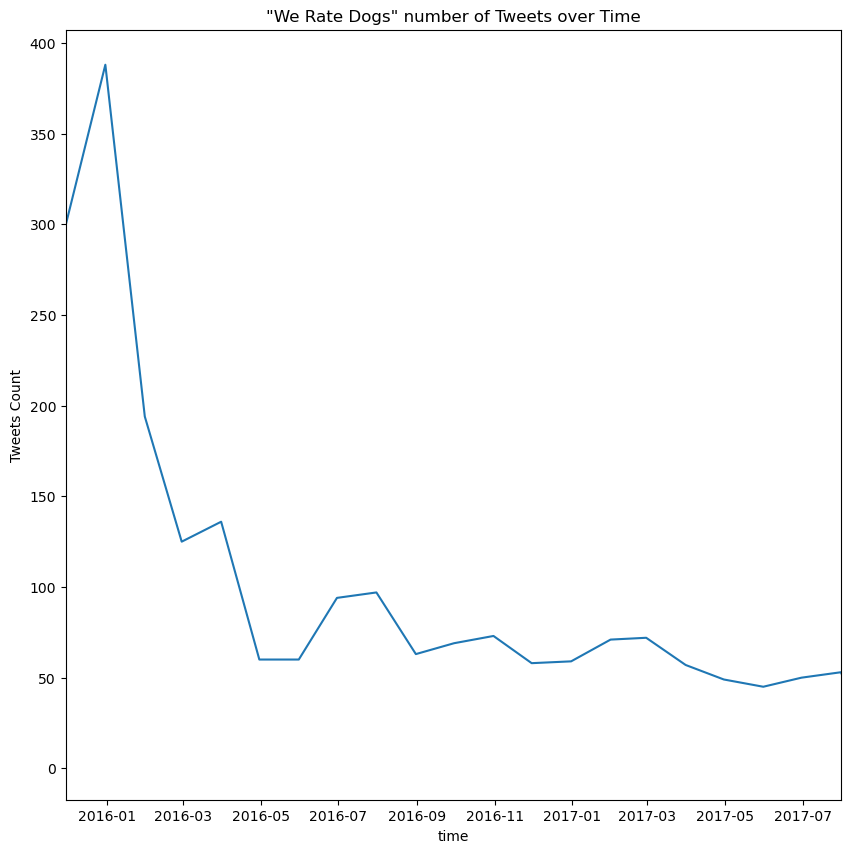

In [834]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 31)]);

plt.xlabel('time');
plt.ylabel('Tweets Count');

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('"We Rate Dogs" number of Tweets over Time');

##### Insight 1:

The number of tweets peeked in `January 2019` at `388`. Then dropped dramatically, to `60` in `April` and `May`. Before flunctuated between `56` and `105` over the remaining months of the period.


2. Visualizing numer of tweet by hours of the day:

In [835]:
daily_tweets = df.copy()
daily_tweets['timestamp'] = pd.to_datetime(daily_tweets['timestamp'], format='%Y-%m-%d %H:%M:%S+%f')
daily_tweets['time'] = daily_tweets['timestamp'].dt.hour


In [836]:

daily_tweets = daily_tweets.groupby(pd.Grouper(key='time')).count().reset_index()
daily_tweets = daily_tweets[['time', 'tweet_id']]

In [837]:
hours = [7,8,9,10,11]
for hour in hours:
    daily_tweets = daily_tweets.append({'time':hour,'tweet_id':0},ignore_index=True)

C:\Users\latong\AppData\Local\Temp\ipykernel_21308\4100041345.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_tweets = daily_tweets.append({'time':hour,'tweet_id':0},ignore_index=True)
C:\Users\latong\AppData\Local\Temp\ipykernel_21308\4100041345.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_tweets = daily_tweets.append({'time':hour,'tweet_id':0},ignore_index=True)
C:\Users\latong\AppData\Local\Temp\ipykernel_21308\4100041345.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_tweets = daily_tweets.append({'time':hour,'tweet_id':0},ignore_index=True)
C:\Users\latong\AppData\Local\Temp\ipykernel_21308\4100041345.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pa

In [838]:
daily_tweets = daily_tweets.sort_values('time')

In [839]:
daily_tweets

,time,tweet_id
1,0,268
3,1,296
16,2,226
5,3,187
15,4,107
18,5,29
17,6,5
19,7,0
20,8,0
21,9,0


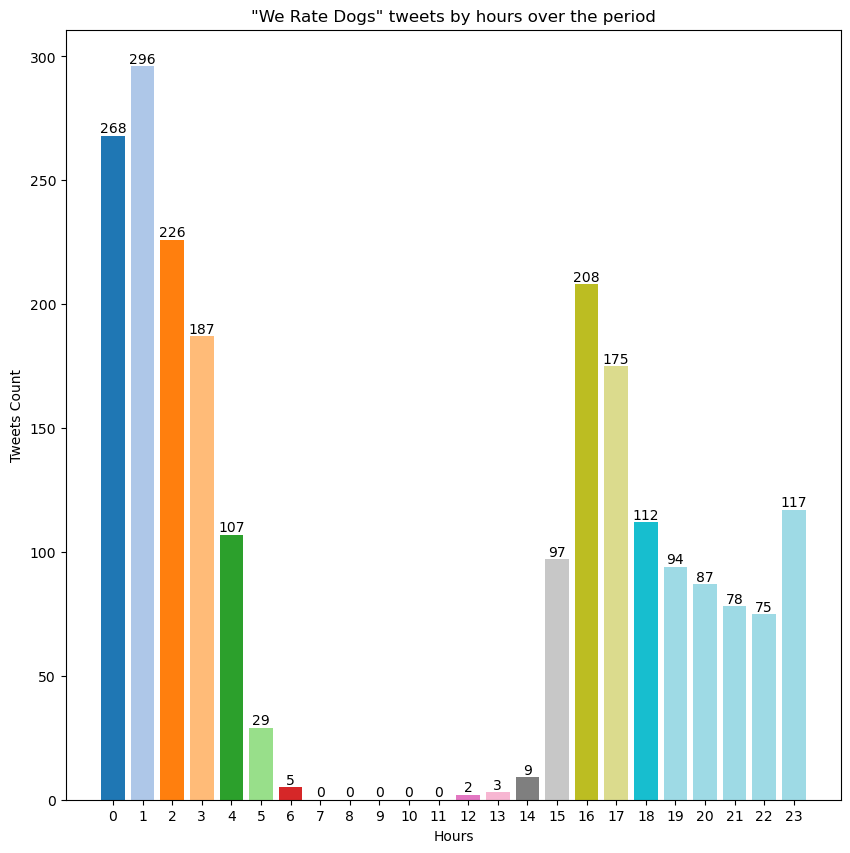

In [840]:
# Plotting tweets count by hours over the period:

plt.figure(figsize=(10, 10));
cmap = plt.get_cmap('tab20');
plt.xlabel('Hours');
plt.ylabel('Tweets Count');
plt.xticks(range(len(daily_tweets.time)), daily_tweets.time)
plt.bar(daily_tweets.time, daily_tweets.tweet_id,color=cmap(range(len(daily_tweets.time))));
for i, v in enumerate(daily_tweets.tweet_id):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title('"We Rate Dogs" tweets by hours over the period');

##### Insights 2:
(UTC time zone)<br>

Over the period, the number of tweets at `1AM` was `328`, accounted for highest number among all hours of a day. While `12AM, 2AM, 3AM, 4PM` and `5PM` are the time of the days witnessed high frequency of tweets from `'We rate dogs'`.<br>
<br>
There was no tweet tweeted during `7AM` to `11AM` over the period.

3. Visualizing Average favorite and Retweet Counts by Hours.

In [841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2175 non-null   object             
 1   in_reply_to_status_id     78 non-null     object             
 2   in_reply_to_user_id       78 non-null     object             
 3   timestamp                 2175 non-null   datetime64[ns, UTC]
 4   source                    2175 non-null   object             
 5   Text                      2103 non-null   object             
 6   expanded_urls             2117 non-null   object             
 7   rating_score_(out_of_10)  2175 non-null   int32              
 8   urls                      2117 non-null   object             
 9   name                      1395 non-null   object             
 10  jpg_url                   1994 non-null   object             
 11  img_num          

3. Visualizing average favourite/reweet number based on the tweet's posting time:

In [842]:
hours_tweet = df.copy()
hours_tweet['timestamp'] = pd.to_datetime(hours_tweet['timestamp'], format='%Y-%m-%d %H:%M:%S+%f')
hours_tweet['time'] = hours_tweet['timestamp'].dt.hour

In [843]:
hours_tweet = hours_tweet.groupby(pd.Grouper(key='time')).mean().reset_index()
hours_tweet = hours_tweet[['time','favorite_count','retweet_count']]

C:\Users\latong\AppData\Local\Temp\ipykernel_21308\2644067672.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hours_tweet = hours_tweet.groupby(pd.Grouper(key='time')).mean().reset_index()


In [844]:
hours_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            19 non-null     int64  
 1   favorite_count  19 non-null     Float64
 2   retweet_count   19 non-null     Float64
dtypes: Float64(2), int64(1)
memory usage: 622.0 bytes


In [845]:
#round the values for visualization:
hours_tweet['favorite_count'] = hours_tweet['favorite_count'].round().astype('Int32')
hours_tweet['retweet_count'] = hours_tweet['retweet_count'].round().astype('Int32')

In [846]:
hours_tweet

,time,favorite_count,retweet_count
0,16,13668,3739
1,0,13133,3713
2,15,10752,3292
3,1,8214,2534
4,17,8963,2577
5,3,4660,1580
6,23,9445,2913
7,20,8222,2871
8,22,8089,2620
9,21,7353,2599


In [847]:
hours_tweet = hours_tweet.sort_values('time')

<Figure size 1000x1000 with 0 Axes>

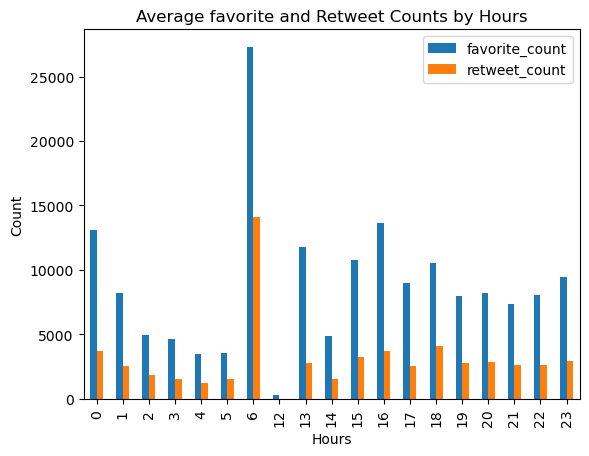

In [848]:
# Group the data by 'time' and calculate the sum of 'favoritecount' and 'retweetcount'
grouped_data = hours_tweet.groupby('time')[['favorite_count', 'retweet_count']].sum()
# Set the figure size
plt.figure(figsize=(10, 10));  #
# Plot the bar chart
grouped_data.plot(kind='bar');
plt.xlabel('Hours');
plt.ylabel('Count');
plt.title('Average favorite and Retweet Counts by Hours');
plt.show();

##### Insights 3:

Overall, tweets posted at `6AM` seemed to received the significantly hight `favorites(s)` and `retweeted(s)`. The abnomaly hight average might due to only `5` tweets were created at at `6AM`. Tweets created during `0AM`, `3PM` and `4PM` also have highest number of `favorite(s)`.

4. Find out which types of dog stages attracted the most 'favorites'

In [849]:
df_stage = df_stages.copy()


In [850]:
df_stage = df_stage.groupby(pd.Grouper(key='stage')).mean().reset_index()
df_stage = df_stage[['stage','favorite_count']]

C:\Users\latong\AppData\Local\Temp\ipykernel_21308\2899691457.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_stage = df_stage.groupby(pd.Grouper(key='stage')).mean().reset_index()


In [851]:
df_stage = df_stage.drop(0)

In [852]:
df_stage

,stage,favorite_count
1,doggo,16632.0
2,puppo,21871.08
3,pupper,7210.536797
4,floofer,11674.9
5,doggopupper,14382.333333


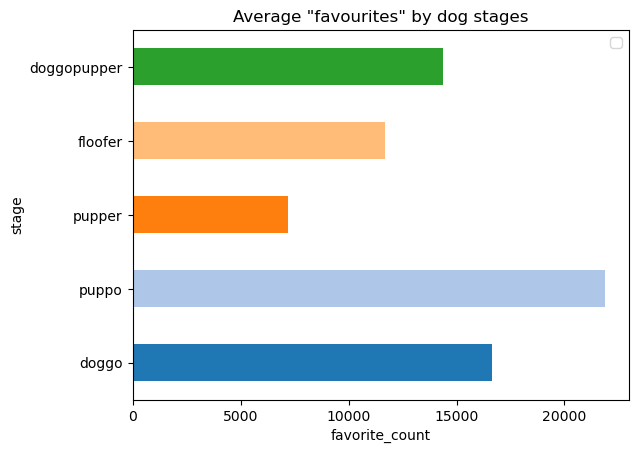

In [853]:
# Plot the vertical bar chart
df_stage.plot.barh(x='stage', y='favorite_count', color=cmap(range(len('favorite_count'))))

# Add labels and title
plt.xlabel('favorite_count')
plt.ylabel('stage')
plt.title('Average "favourites" by dog stages')
plt.legend(labels=[])
# Display the chart
plt.show()

##### Insight 4:
`puppo` posts seemed to received the highest number of `favourite` among 4 categorized dog stages. While `pupper` images had the lowest average `favorite` count.